In [23]:
lista_paquetes = c('factoextra','psych','corrplot','readr','tidyverse', 'DescTools', 'here','blockcluster', 'knitr', 'readxl', 'ggplot2')
nuevos_paquetes = lista_paquetes[!(lista_paquetes %in% installed.packages()[,"Package"])]
if(length(nuevos_paquetes)) install.packages(nuevos_paquetes, dependencies = TRUE)

In [2]:
suppressWarnings(suppressMessages(easypackages::libraries(lista_paquetes)))

In [3]:
PATH = here::here('datos') 

# Archivo con los datos
datos = read.csv(file.path(PATH,"consumos_2018.csv"),
                  sep = ";",
                  dec = ",",
                  header = TRUE
                 )

desc_campos = readxl::read_xlsx(file.path(PATH,"desc_campos.xlsx"))


In [4]:
desc_campos

campo,desc
kids_r,Porcentaje de hogares con niños en el radio censal
prop_r,Porcentaje de propietarios en el radio censal
resid,Mediana de la longitud de residencia en el radio censal
age,Mediana de la edad en el radio censal
inc_r,Mediana del ingreso del hogar en el radio censal
persh,Mediana del número de personas en el hogar en el radio censal
inc_b,Mediana del ingreso del hogar en el bloque (superficie mayor al radio censal)
prop_b,Porcentaje de propietarios en el bloque (superficie mayor al radio censal)
kids_b,Porcentaje de hogares con niños en el bloque (superficie mayor al radio censal)
kids_r,Porcentaje de hogares con niños en el radio censal


In [5]:
head(datos)

id,zona,kids_r,prop_r,resid,age,inc_r,persh,inc_b,prop_b,...,var_0003,var_0004,var_0005,var_0006,var_0007,var_0008,var_0009,var_0010,var_0011,var_0012
43091,5,22.25293,89.39450,17.380952,52.83934,74167.05,2.0,64342.11,75.82090,...,0,0,0,0,0,0,0,0,0,0
49479,3,29.03533,78.40172,5.800000,40.87474,45960.51,1.0,37022.47,65.06024,...,0,0,1,0,0,0,0,0,0,0
38425,4,48.44114,80.58556,9.285714,53.72832,132989.89,2.6,129861.11,93.62745,...,0,0,0,0,0,0,0,0,0,0
3769,2,34.45740,87.34412,15.072727,64.13734,52920.98,2.0,58786.23,94.78138,...,0,1,0,1,0,0,0,0,0,0
43277,2,26.33905,83.59026,5.959305,41.93635,47585.91,1.6,52727.27,77.41935,...,0,0,0,0,0,0,0,0,0,0
33378,5,34.53572,55.23685,7.500000,51.50443,40944.34,1.6,44873.42,35.52632,...,1,0,0,0,0,0,0,0,0,1


In [6]:
summary(datos)


       id             zona           kids_r           prop_r      
 Min.   :    3   Min.   :1.000   Min.   :  1.00   Min.   :  1.00  
 1st Qu.:14528   1st Qu.:2.000   1st Qu.: 21.57   1st Qu.: 67.11  
 Median :29212   Median :3.000   Median : 31.71   Median : 81.07  
 Mean   :29168   Mean   :2.944   Mean   : 35.19   Mean   : 70.37  
 3rd Qu.:43759   3rd Qu.:4.000   3rd Qu.: 44.08   3rd Qu.: 87.58  
 Max.   :58567   Max.   :5.000   Max.   :100.00   Max.   :100.00  
     resid             age            inc_r            persh      
 Min.   : 0.250   Min.   :19.08   Min.   :  4414   Min.   :1.000  
 1st Qu.: 5.500   1st Qu.:43.24   1st Qu.: 32283   1st Qu.:1.400  
 Median : 8.690   Median :50.63   Median : 47217   Median :2.000  
 Mean   : 9.443   Mean   :51.12   Mean   : 53807   Mean   :2.174  
 3rd Qu.:12.700   3rd Qu.:57.85   3rd Qu.: 69000   3rd Qu.:2.700  
 Max.   :20.500   Max.   :91.07   Max.   :563934   Max.   :8.200  
     inc_b            prop_b           kids_b         var_0001

In [7]:
# Variables a utilizar
vars_to_cluster = c("kids_r", "prop_r", "resid", "age", "inc_r", "persh", 
                     "inc_b", "prop_b", "kids_b")

dfDemograficas = datos %>% 
                  select(all_of(vars_to_cluster))



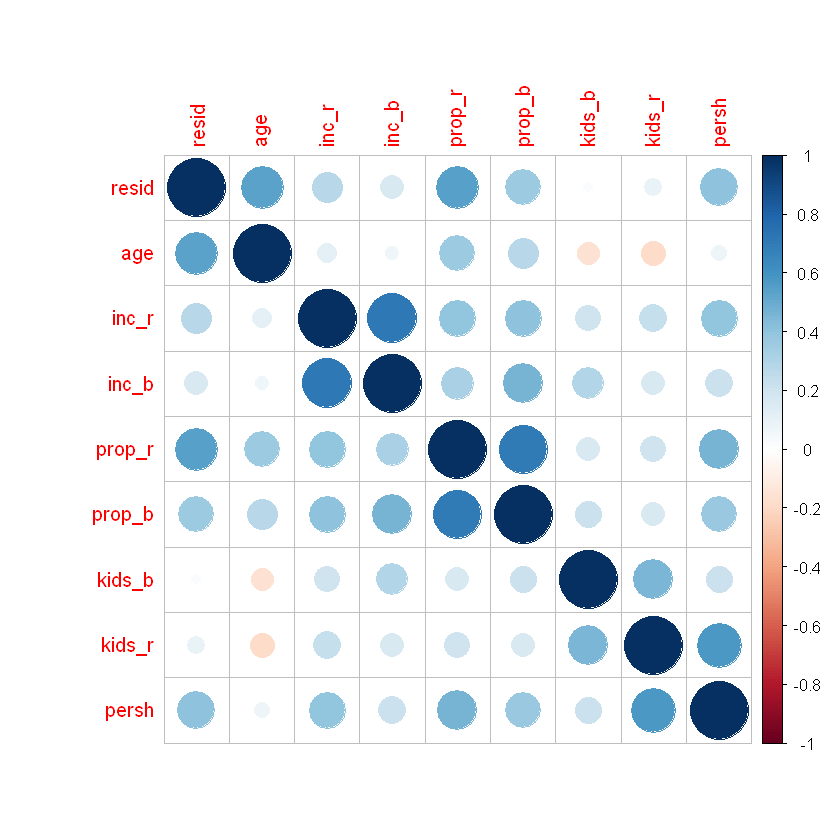

In [8]:
#Graficas de la matriz de correlaciones utilizando las alternativas de la librería “psych”

corrplot(cor(dfDemograficas), order = "hclust")


In [9]:
# Estandarizar las variables
dfDemograficasStd = scale(dfDemograficas)




In [10]:
# Suma de cuadrado error (o within)---
wss <- (nrow(dfDemograficasStd) - 1) * sum(apply(dfDemograficasStd, 2, var))
for (i in 2:10) {
  wss[i] <- sum(kmeans(dfDemograficasStd, centers = i)$withinss)
                }

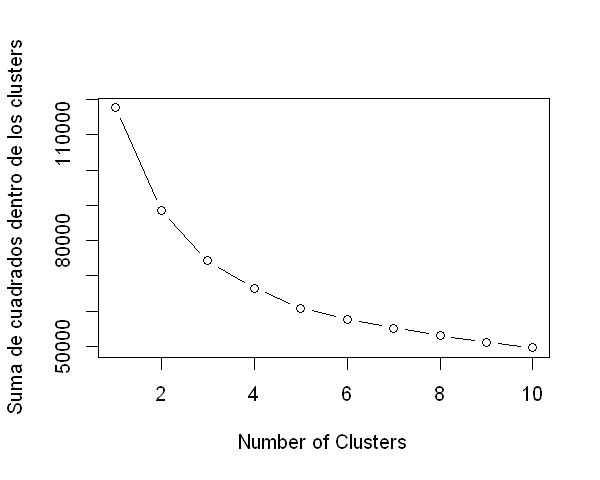

In [11]:
options(repr.plot.width=5, repr.plot.height=4)
plot(1:10, wss, type = "b", xlab = "Number of Clusters",
     ylab = "Suma de cuadrados dentro de los clusters")



In [12]:
# Indice Silhouette  ---
#factoextra::fviz_nbclust(as.data.frame(dfDemograficasStd), kmeans, method = "wss") +
#  labs(title    = "Número óptimo de clusters a considerar",
#       subtitle = "Indice Silhouette")


In [13]:
# Agrupamiento no jerarquico
clustering <- kmeans(dfDemograficasStd, centers = 4)


dfDemograficas$cluster <- clustering$cluster
#dfDemograficasStds$cluster <- clustering$cluster

formula_para_describir <- as.formula(
  paste0( paste(vars_to_cluster, collapse = " + "), " ~ cluster") 
                                    )

tablaResumen <- describeBy(  formula_para_describir, 
                              mat = TRUE, 
                              data = dfDemograficas
                           )

tablaResumen =  tablaResumen %>% 
                dplyr::mutate(variable = rownames(.),
                              cv       = 100 * sd / abs(mean) ) %>% 
                dplyr::rename(cluster = group1) %>% 
                dplyr::select(variable, cluster, n, mean, median, cv, min, max) %>% 
                arrange(as.numeric(as.character(cluster)))   %>% 
                mutate(variable = substr(variable, 1, nchar(variable)-1))

tablaResumen = tablaResumen  %>% 
               merge(desc_campos, by.x = 'variable', by.y = 'campo', all.x = TRUE)

tablaResumen

variable,cluster,n,mean,median,cv,min,max,desc
age,4,2858,50.900627,50.687037,14.581318,27.442767,79.79253,Mediana de la edad en el radio censal
age,3,3939,61.026468,60.125643,13.341945,30.563985,91.06930,Mediana de la edad en el radio censal
age,2,3990,45.965496,45.686307,14.502118,19.075563,78.46847,Mediana de la edad en el radio censal
age,1,2287,43.309350,41.328283,24.592108,20.445600,82.76818,Mediana de la edad en el radio censal
inc_b,4,2858,80047.457711,77526.408450,31.683334,23686.131390,188730.69470,Mediana del ingreso del hogar en el bloque (superficie mayor al radio censal)
inc_b,3,3939,50042.688148,47347.560980,31.580170,13750.000000,135433.07090,Mediana del ingreso del hogar en el bloque (superficie mayor al radio censal)
inc_b,2,3990,48027.135713,45679.077890,31.175527,12923.076920,122839.50620,Mediana del ingreso del hogar en el bloque (superficie mayor al radio censal)
inc_b,1,2287,41160.676583,38333.333330,40.488851,10836.653390,126724.13790,Mediana del ingreso del hogar en el bloque (superficie mayor al radio censal)
inc_r,2,3990,42504.288003,40700.212870,40.039800,6668.258612,141491.96140,Mediana del ingreso del hogar en el radio censal
inc_r,1,2287,32626.057576,29164.525410,55.651209,4414.221077,144874.89400,Mediana del ingreso del hogar en el radio censal


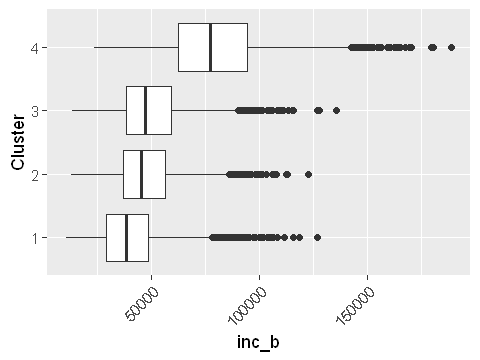

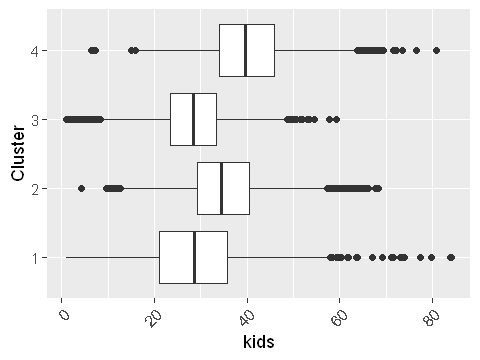

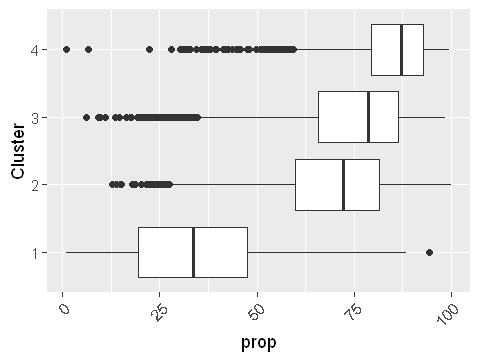

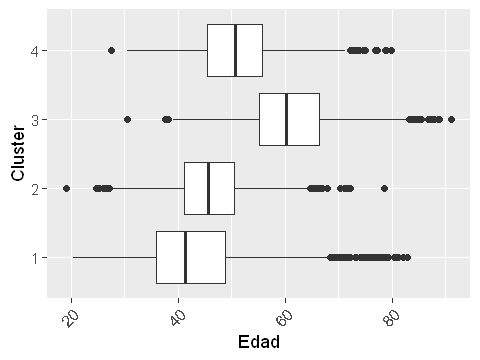

In [53]:
dfDemograficas = dfDemograficas  %>% 
              mutate(cluster = as.factor(cluster))

par(mfrow=c(2,2))

ggplot(dfDemograficas) +
  aes(x=inc_b, y=cluster) +
  geom_boxplot()  +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(x = "inc_b", y = "Cluster")

 ggplot(dfDemograficas) +
  aes(x=kids_b, y=cluster) +
  geom_boxplot()  +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(x = "kids", y = "Cluster")

 ggplot(dfDemograficas) +
  aes(x=prop_b, y=cluster) +
  geom_boxplot()  +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(x = "prop", y = "Cluster")

ggplot(dfDemograficas) +
  aes(x=age, y=cluster) +
  geom_boxplot()  +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(x = "Edad", y = "Cluster")


In [14]:
head(dfDemograficas)

kids_r,prop_r,resid,age,inc_r,persh,inc_b,prop_b,kids_b,cluster
22.25293,89.39450,17.380952,52.83934,74167.05,2.0,64342.11,75.82090,41.79104,3
29.03533,78.40172,5.800000,40.87474,45960.51,1.0,37022.47,65.06024,41.76707,2
48.44114,80.58556,9.285714,53.72832,132989.89,2.6,129861.11,93.62745,38.23529,4
34.45740,87.34412,15.072727,64.13734,52920.98,2.0,58786.23,94.78138,26.51622,3
26.33905,83.59026,5.959305,41.93635,47585.91,1.6,52727.27,77.41935,43.54839,2
34.53572,55.23685,7.500000,51.50443,40944.34,1.6,44873.42,35.52632,65.57018,2


## Preguntas

### 2.1
Decididimos aplicar K-means y nos quedamos con 4 grupos.

### 2.2
En estos 4 grupos encontramos las siguientes características. El grupo 1 tiene las personas de mayor edad y de menor cantidad de ingresos, con pocas casas habitadas por niños. Podrían ser jubilados. El grupo 2 tiene las personas mas jóvenes, con poca cantidad de propietarios, menos ingresos y bajo porcentaje de niños. Podrian ser jovenes estudiantes. El grupo 3 tienen mas cantidad de familias con niños, muchos son propietarios y tienen los salarios mas altos. Podriamos pensar que son familias tipos con buen nivel adquisitivo. En el grupo 4 tenemos tambien personas de edad media, con hijos, ingresos no tan altos y una buena cantidad de propietarios aunque no tantos como en el grupo 3. Podriamos decir que son familias de menor nivel adquisitivo del grupo 3 y un poco mas jovenes. 

### 2.3
Decidimos no incluir la zona porque es una variable categórica en escala ordinal y el método no jerárquico Kmeans requiere que todas las variables utilizadas sean continuas.

### 2.4
Si quisieramos incluir la zona en el análisis, podriamos decidir utilizar algun otro método que sea jerárquico. Si no decidimos hacer esto y seguimos utilizando KMeans podrímos intentar observar que sucedió con los clusters con respecto a la zona. De todas formas vamos a intentar ver que sucede:


In [55]:
# Variables a utilizar
vars_to_cluster = c("kids_r", "prop_r", "resid", "age", "inc_r", "persh", 
                     "inc_b", "prop_b", "kids_b", 'zona')

df_Dem_Zona = datos %>% 
                  select(all_of(vars_to_cluster))

df_Dem_Zona_Std = scale(df_Dem_Zona)



In [16]:
# Suma de cuadrado error (o within)---
wss_2 <- (nrow(df_Dem_Zona_Std) - 1) * sum(apply(df_Dem_Zona_Std, 2, var))

for (i in 2:11) {
  wss_2[i] <- sum(kmeans(df_Dem_Zona_Std, centers = i)$withinss)
                }

Warning message:
"did not converge in 10 iterations"

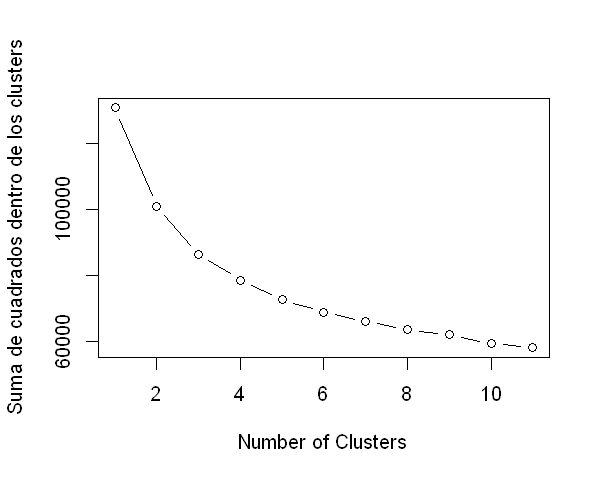

In [20]:
options(repr.plot.width=5, repr.plot.height=4)

plot(1:11, wss_2, type = "b", xlab = "Number of Clusters",
     ylab = "Suma de cuadrados dentro de los clusters")


In [34]:
# Agrupamiento no jerarquico
clustering_2 <- kmeans(df_Dem_Zona_Std, centers = 4)


df_Dem_Zona$cluster <- clustering_2$cluster

#dfDemograficasStds$cluster <- clustering$cluster

formula_para_describir_2 <- as.formula(
  paste0( paste(vars_to_cluster, collapse = " + "), " ~ cluster") 
                                    )

tablaResumen_2 <- describeBy(  formula_para_describir_2, 
                              mat = TRUE, 
                              data = df_Dem_Zona
                           )

tablaResumen_2 =  tablaResumen_2 %>% 
                dplyr::mutate(variable = rownames(.),
                              cv       = 100 * sd / abs(mean) ) %>% 
                dplyr::rename(cluster = group1) %>% 
                dplyr::select(variable, cluster, n, mean, median, cv, min, max) %>% 
                arrange(as.numeric(as.character(cluster)))   %>% 
                mutate(variable = substr(variable, 1, nchar(variable)-1))

tablaResumen_2 = tablaResumen_2  %>% 
               merge(desc_campos, by.x = 'variable', by.y = 'campo', all.x = TRUE)

#tablaResumen_2

In [37]:
df_Dem_Zona = df_Dem_Zona  %>% 
              mutate(cluster = as.factor(cluster))

options(repr.plot.width=4, repr.plot.height=3)


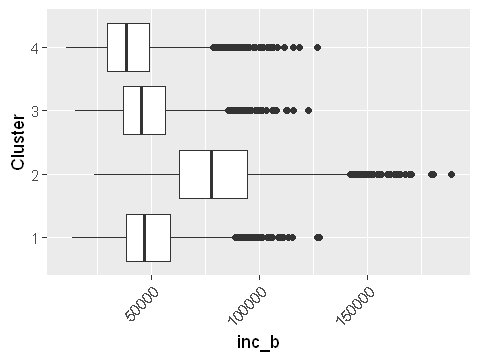

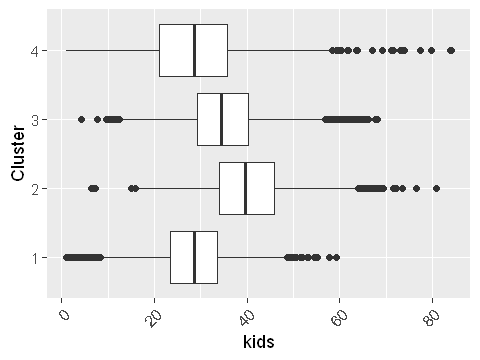

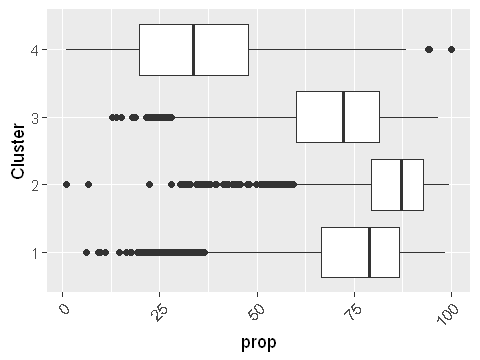

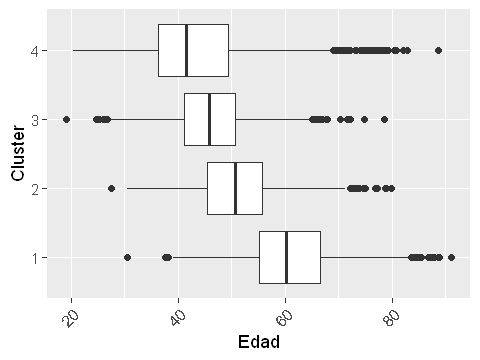

In [44]:
par(mfrow=c(2,2))

ggplot(df_Dem_Zona) +
  aes(x=inc_b, y=cluster) +
  geom_boxplot()  +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(x = "inc_b", y = "Cluster")

 ggplot(df_Dem_Zona) +
  aes(x=kids_b, y=cluster) +
  geom_boxplot()  +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(x = "kids", y = "Cluster")

 ggplot(df_Dem_Zona) +
  aes(x=prop_b, y=cluster) +
  geom_boxplot()  +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(x = "prop", y = "Cluster")

ggplot(df_Dem_Zona) +
  aes(x=age, y=cluster) +
  geom_boxplot()  +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(x = "Edad", y = "Cluster")


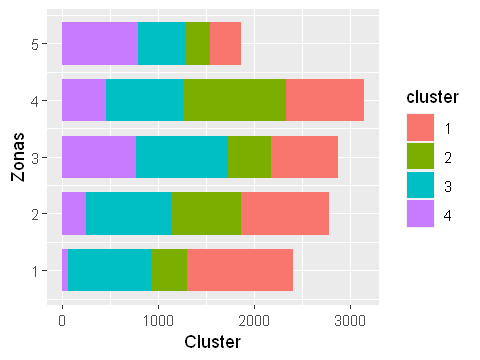

In [54]:
ggplot(df_Dem_Zona) + 
   aes(x = zona, fill = cluster) +
  geom_bar(width = 0.75) + 
  labs(y = "Cluster", x = "Zonas") +
  coord_flip()

Decidimos tambien seleccionar 4. Lo que vemos es que los clusters no tienen niguna relacion con las zonas. Es decir, que en cada cluster tenemos varias observaciones de todas las zonas.

### 2.5
